In [7]:
# Kết nối Google Colab vào Google Drive
from google.colab import drive
drive.mount("/content/drive")
# Chuyển đến thư mục làm việc
%cd /content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code

Mounted at /content/drive
/content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code


In [14]:
pwd

'/content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code'

In [15]:
ls

 2320_ThiChung.xlsx             'Lab 2.pdf'
 advertising.csv                 LG_kiemtra.ipynb
 Alpha_beta.py                   Logistic_kiemtra.ipynb
'A One Sample.ipynb'             mini_batch_gradient_descent.ipynb
'A One Sample.py'                mini_batch_gradient_descent.py
 bath_gradient_descent.ipynb     Mucnuoc.ipynb
 bath_gradient_descent.py        Mucnuoc.py
'B One Sample.py'                NLP_Demo/
'C m Samples.ipynb'              nn.py
'C m Samples.py'                 Peceptron.py
'Code Game.gform'                Perceptron.ipynb
'Code Game (Responses).gsheet'   pla_vis.gif
'Copy of advertising.csv'       'Search in Pacman.gslides'
 Countries-exercise.csv          search.zip
 data.csv                        Simple_Kmean_CSV.ipynb
 data_lr.csv                     Simple_Kmean.ipynb
'DD Sample Vectorization.py'    'Single Layer Perceptron Dataset 2.csv'
'D sample Vectorization.py'      stochastic_gradient_descent.py
'F N Samples Vectorization.py'   Tic.ipynb
 GDwithMomentum

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def initialize_K_centroids(X, K):
    m,n = X.shape
    k_rand = np.ones((K, n))
    k_rand = X[np.random.choice(range(len(X)), K, replace=False),:]
    return k_rand

In [10]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # compute distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        c[i] = np.argmin(distances)
    return c

In [11]:
def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points_belong_k = X[np.where(idx == k)]
        centroids[k] = np.mean(points_belong_k, axis=0,)
    return centroids

In [12]:
def find_k_means(X, K, max_iters=10):
    _, n = X.shape
    centroids = initialize_K_centroids(X, K)
    centroid_history = np.zeros((max_iters, K, n))
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
    return centroids, idx

In [16]:
data = pd.read_csv('Countries-exercise.csv')
data.head(20)

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [17]:
data.shape

(241, 3)

In [18]:
X = data.iloc[:, 1:3]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


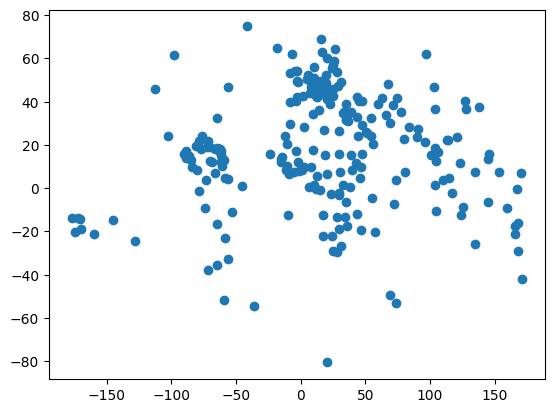

In [19]:
X = np.array(X)
plt.scatter(X[:,0], X[:,1])

In [20]:
centroids, idx = find_k_means(X, 5, max_iters=10)

In [21]:
centroids

array([[ 54.98225349,  29.74153866],
       [-82.03484643,   5.55229685],
       [130.75669881,   6.31280457],
       [ 31.79538383, -13.01264623],
       [  6.82194037,  39.39586484]])

In [22]:
idx

array([1., 0., 3., 1., 4., 4., 4., 0., 1., 0., 1., 3., 2., 3., 1., 2., 4.,
       0., 3., 4., 4., 4., 0., 4., 0., 1., 1., 4., 1., 4., 1., 1., 1., 1.,
       1., 2., 0., 3., 3., 4., 1., 2., 4., 3., 3., 3., 1., 1., 3., 4., 1.,
       1., 1., 1., 0., 0., 4., 4., 0., 1., 4., 1., 4., 1., 0., 0., 4., 4.,
       3., 4., 2., 1., 4., 4., 2., 3., 4., 0., 4., 4., 4., 4., 4., 3., 4.,
       1., 4., 1., 2., 1., 2., 3., 1., 4., 1., 4., 2., 4., 0., 2., 3., 4.,
       0., 0., 4., 0., 4., 1., 4., 0., 2., 0., 0., 3., 0., 2., 1., 1., 2.,
       4., 0., 2., 0., 4., 4., 1., 4., 0., 3., 4., 4., 4., 2., 1., 4., 4.,
       4., 3., 0., 1., 2., 4., 4., 4., 2., 4., 2., 2., 3., 4., 1., 3., 3.,
       2., 3., 2., 4., 2., 4., 1., 1., 4., 4., 0., 2., 2., 0., 0., 1., 1.,
       1., 2., 2., 2., 4., 1., 2., 4., 1., 0., 1., 0., 4., 0., 3., 4., 0.,
       0., 3., 4., 2., 1., 3., 2., 4., 1., 4., 0., 3., 1., 4., 3., 1., 4.,
       4., 4., 3., 1., 3., 0., 1., 4., 4., 2., 0., 0., 2., 1., 1., 4., 0.,
       2., 3., 3., 4., 1.

In [23]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = idx
data_with_clusters

,name,Longitude,Latitude,Clusters
0,Aruba,-69.982677,12.520880,1.0
1,Afghanistan,66.004734,33.835231,0.0
2,Angola,17.537368,-12.293361,3.0
3,Anguilla,-63.064989,18.223959,1.0
4,Albania,20.049834,41.142450,4.0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1.0
237,Yemen,47.586762,15.909280,0.0
238,South Africa,25.083901,-29.000341,3.0
239,Zambia,27.774759,-13.458242,3.0
